```
1. Your views about the problem statement?
```
-> 
this problem statement contain predicting the ctc of newly hired employee based on dependant feature (CTC) and 
Independant Feature (college, city, role, previous CTC, job changes, graduation marks, experience, and metro city status) ,
to solve this problem statement consist data preparation , data  pre-processing , Exploratory data analysis ,Model training, Model evaluation ,
Model selection .

```
2. What will be your approach to solving this task?
```
->
1. Data preparation -> there is three dataset contain cites , colleges , ml case study to which i have create a one function 
    which merge the meterocity  data into the main ml case study file and create a one variable which associate with college and show the college is
    tier I , II , III section
2. Data preprocessing -> Handling missing values, converting categorical data to numerical, and creating dummy variables.
3. Exploratory data analysis ->  Check for outliers and understanding feature distribution
4. Model training ->  Train  regression models and selecting the best one
5. Model evaluation -> Evaluating models using MSE, and R2 score
6. Model selection -> Choose best performing model 

```
3. What ML model options did you have available to perform this task?
```
->
1. Linear Regression
2. Decision Tree Regressor
3. Random Forest Regressor


```
4. Which model’s performance is best and what could be the possible reason for that?
```
-> Random Forest Regressor performace is very high compair to other regression model,  due to ability to handle non-linear relationships .

```
5. What steps can you take to improve this selected model’s performance even further?
```
->
Hyperparameter tuning ->  Using Grid Search CV  or Random Search to optimize model parameters.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

#### Data Loading

In [3]:
data = pd.read_csv('ML case Study.csv' , header=0)
city = pd.read_csv('cities.csv' , header=0)
college = pd.read_csv('colleges.csv' , header=0)

#### Data Pre-processing

In [4]:
metrocity = {}
for i in city['Metrio City']:
    metrocity[i] = 'Metro'
for i in city['non-metro cities']:
    metrocity[i] = 'Non-Metro'


In [5]:
metrocity

{'Mumbai': 'Metro',
 'Delhi': 'Metro',
 'Kolkata': 'Metro',
 'Chennai': 'Metro',
 'Bangalore': 'Metro',
 'Hyderabad': 'Metro',
 'Ahmedabad': 'Metro',
 'Pune': 'Metro',
 'Surat': 'Metro',
 'Dehradun': 'Non-Metro',
 'Durgapur': 'Non-Metro',
 'Asansol': 'Non-Metro',
 'Rourkela': 'Non-Metro',
 'Kozhikode': 'Non-Metro',
 'Rajpur Sonarpur': 'Non-Metro',
 'Kolhapur': 'Non-Metro',
 'Ajmer': 'Non-Metro',
 nan: 'Non-Metro'}

In [6]:
data['Metrocity'] = data['City'].map(metrocity)

In [7]:
data['Metrocity'].unique()

array(['Non-Metro', 'Metro'], dtype=object)

In [8]:
data.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Metrocity
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58,Non-Metro
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87,Non-Metro
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02,Non-Metro
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39,Non-Metro
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10,Non-Metro


In [9]:
data['Role'].unique()

array(['Manager', 'Executive'], dtype=object)

In [10]:
college_tier_melted = college.melt(var_name='Tier', value_name='College').dropna()

In [11]:
college_tier_melted.shape

(69, 2)

In [12]:
college_tier_melted

,Tier,College
0,Tier 1,IIT Bombay
1,Tier 1,IIT Delhi
2,Tier 1,IIT Kharagpur
3,Tier 1,IIT Madras
4,Tier 1,IIT Kanpur
...,...,...
70,Tier 3,"IEM, Kolkata"
71,Tier 3,"Techno India, Kolkata"
72,Tier 3,"Jaypee, Noida"
73,Tier 3,"Amrita University, Coimbatore"


In [13]:
college_tier_melted['Tier'] = college_tier_melted['Tier'].str.replace('Tier ', '').astype(int)

In [14]:
data = data.merge(college_tier_melted, on='College', how='left')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 0 to 1588
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   int64  
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
 8   Metrocity            1589 non-null   object 
 9   Tier                 1589 non-null   int32  
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 130.3+ KB


In [16]:
data['Tier'] = data['Tier'].astype(int)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 0 to 1588
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   int64  
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
 8   Metrocity            1589 non-null   object 
 9   Tier                 1589 non-null   int32  
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 130.3+ KB


In [18]:
data

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Metrocity,Tier
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58,Non-Metro,2
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87,Non-Metro,2
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02,Non-Metro,3
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39,Non-Metro,3
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10,Non-Metro,1
...,...,...,...,...,...,...,...,...,...,...
1584,BITS Pilani (Goa Campus),Surat,Executive,61285,3,44,60,77283.59,Metro,1
1585,NIT Warangal,Rajpur Sonarpur,Executive,63140,1,44,24,68416.86,Non-Metro,1
1586,NIT Tiruchipally (Trichy),Ahmedabad,Executive,44907,1,60,19,70186.19,Metro,1
1587,IIIT Hyderabad,Durgapur,Executive,52054,2,67,29,73394.09,Non-Metro,1


#### Handling Category Data

In [19]:
city_map = {'Metro': 1, 'Non-Metro': 0}
data['Metrocity'] = data['Metrocity'].map(city_map)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 0 to 1588
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   int64  
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
 8   Metrocity            1589 non-null   int64  
 9   Tier                 1589 non-null   int32  
dtypes: float64(1), int32(1), int64(5), object(3)
memory usage: 130.3+ KB


In [20]:
data = pd.get_dummies(data, columns=['Role'],drop_first=True)

In [21]:
data.rename(columns={'Role_Manager': 'Role'}, inplace=True)

In [22]:
data # Manager -> 1 , Executive -> 0

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Metrocity,Tier,Role
0,SVNIT Surat,Asansol,55523,3,66,19,71406.58,0,2,1
1,NIT Bhopal,Ajmer,57081,1,84,18,68005.87,0,2,0
2,"IEM, Kolkata",Rajpur Sonarpur,60347,2,52,28,76764.02,0,3,0
3,"KIIT, Bhubaneswar",Ajmer,49010,2,81,33,82092.39,0,3,0
4,DTU,Durgapur,57879,4,74,32,73878.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1584,BITS Pilani (Goa Campus),Surat,61285,3,44,60,77283.59,1,1,0
1585,NIT Warangal,Rajpur Sonarpur,63140,1,44,24,68416.86,0,1,0
1586,NIT Tiruchipally (Trichy),Ahmedabad,44907,1,60,19,70186.19,1,1,0
1587,IIIT Hyderabad,Durgapur,52054,2,67,29,73394.09,0,1,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 0 to 1588
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Previous CTC         1589 non-null   int64  
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Metrocity            1589 non-null   int64  
 8   Tier                 1589 non-null   int32  
 9   Role                 1589 non-null   uint8  
dtypes: float64(1), int32(1), int64(5), object(2), uint8(1)
memory usage: 119.5+ KB


In [24]:
data.drop(columns=['College', 'City'], inplace=True)

#### visualize the data

In [25]:
data.corr()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Metrocity,Tier,Role
Previous CTC,1.000000,0.005756,-0.032976,0.119163,0.258000,0.004644,0.041979,0.012321
Previous job change,0.005756,1.000000,0.019267,0.023488,0.011370,0.051670,-0.055060,-0.017150
Graduation Marks,-0.032976,0.019267,1.000000,-0.057061,-0.005450,-0.018616,0.003539,0.017858
EXP (Month),0.119163,0.023488,-0.057061,1.000000,0.301115,-0.023613,0.011752,-0.026751
CTC,0.258000,0.011370,-0.005450,0.301115,1.000000,-0.020365,-0.029592,0.621311
Metrocity,0.004644,0.051670,-0.018616,-0.023613,-0.020365,1.000000,-0.014946,-0.048671
Tier,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014946,1.000000,-0.014749
Role,0.012321,-0.017150,0.017858,-0.026751,0.621311,-0.048671,-0.014749,1.000000


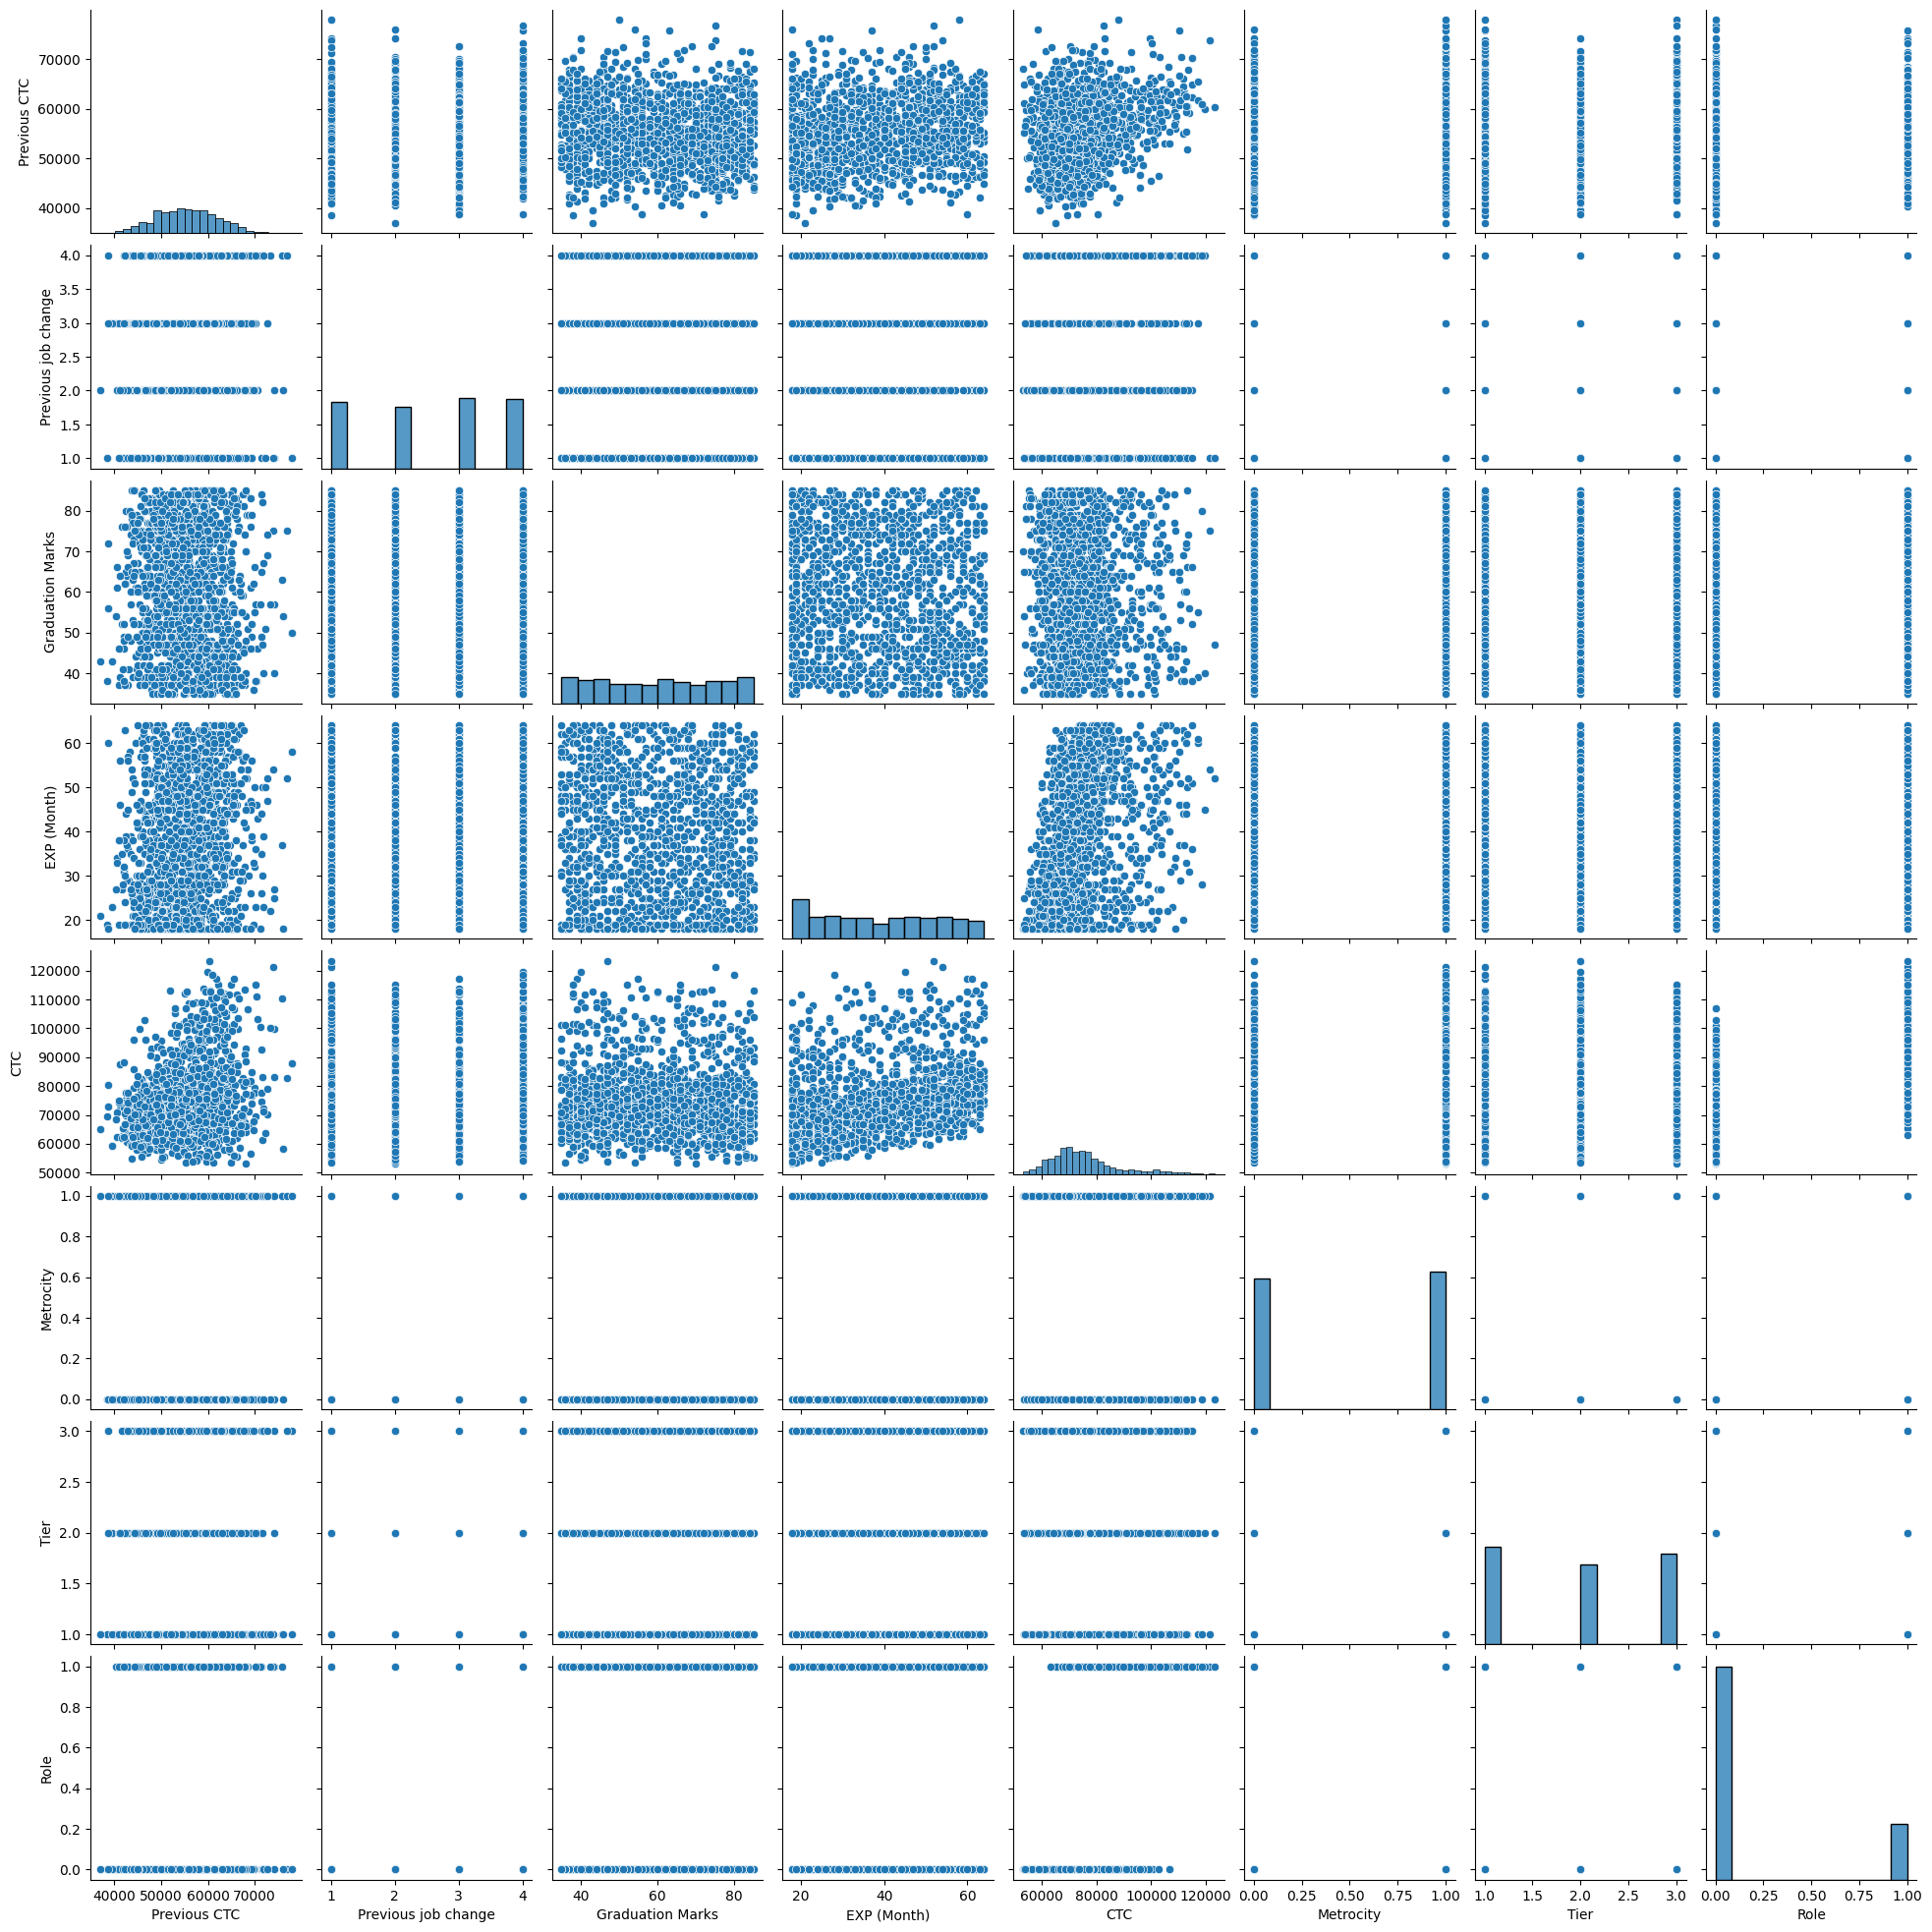

In [26]:
sns.pairplot(data)

<Axes: xlabel='CTC', ylabel='Count'>

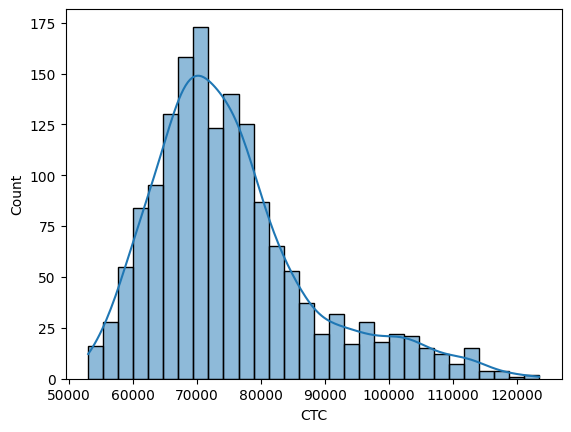

In [27]:
sns.histplot(data['CTC'], kde=True, bins=30)

<Axes: xlabel='Role', ylabel='count'>

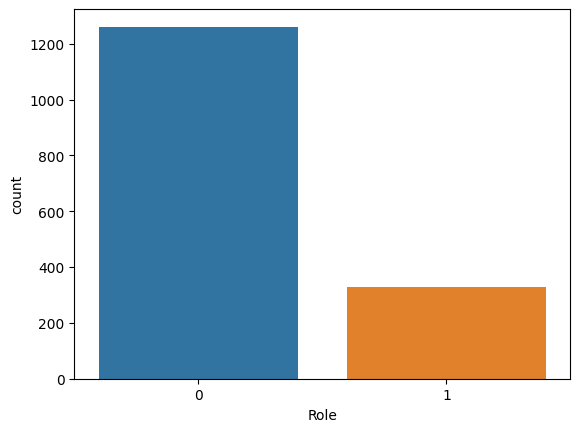

In [28]:
sns.countplot(x='Role', data= data)

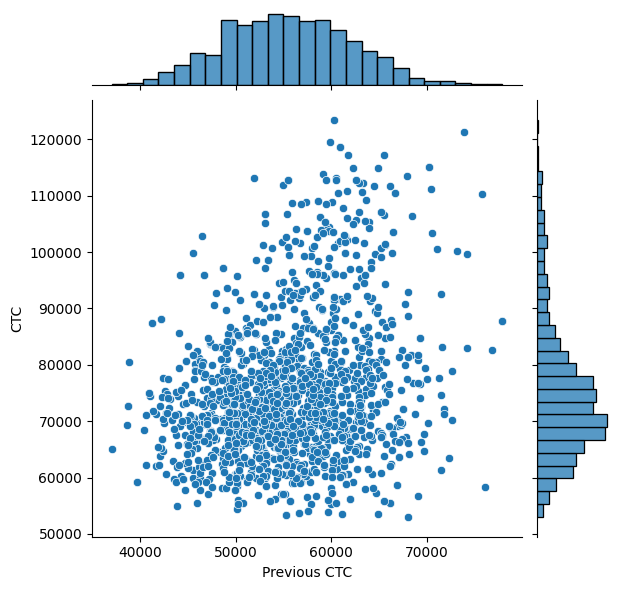

In [29]:
sns.jointplot(x='Previous CTC',y='CTC' , data= data)

#### Split the train and test data  

In [30]:
X= data.drop(columns='CTC',axis=1)
y=data['CTC']

In [31]:
from sklearn.model_selection import train_test_split

X_train ,X_test ,y_train ,y_test = train_test_split(X,y ,random_state=42 , test_size=0.2)

#### Linear Regression model 01 

In [32]:
from sklearn.linear_model import LinearRegression
model_01 = LinearRegression(n_jobs=-1)
model_01.fit(X_train , y_train)

LinearRegression(n_jobs=-1)

In [33]:
y_pred_test = model_01.predict(X_test)
y_pred_train  = model_01.predict(X_train)

In [34]:
from sklearn.metrics import r2_score , mean_squared_error 

In [35]:
r2_score(y_train , y_pred_train)

0.5137747142134839

In [36]:
r2_score(y_test , y_pred_test)

0.5933517958384853

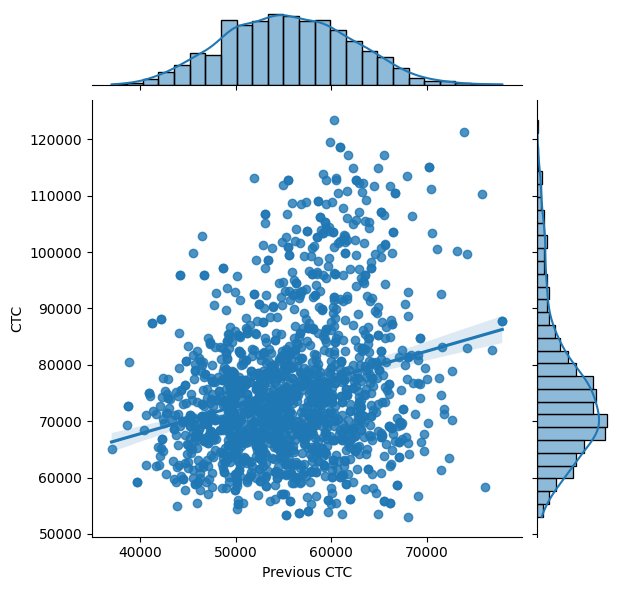

In [37]:
sns.jointplot(data,x='Previous CTC' , y='CTC', kind='reg')

#### Random Forest Regression model 02

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model_02 = RandomForestRegressor(n_estimators=250 , random_state=42)

In [39]:
param_grid= { 'max_features':[4,5,6,7,8,9,10] ,
                'min_samples_split':[2,3,10]}

In [40]:
grid_search = GridSearchCV(model_02 , param_grid , n_jobs=-1 , cv=5)

In [41]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=250, random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]})

In [42]:
grid_search.best_params_

{'max_features': 4, 'min_samples_split': 3}

In [43]:
cvrf_model_02 = grid_search.best_estimator_

In [44]:
r2_score(y_train , cvrf_model_02.predict(X_train))

0.938108358315731

In [45]:
r2_score(y_test , cvrf_model_02.predict(X_test))

0.642253372562527

#### Decision Regression model 03

In [46]:

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

model_03 = DecisionTreeRegressor(max_depth=3,)

model_03.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [47]:
y_pred_test_03 = model_03.predict(X_test)
y_pred_train_03 = model_03.predict(X_train)

In [48]:
r2_score(y_train , y_pred_train_03)

0.6062958846879378

In [49]:
r2_score(y_test , y_pred_test_03)

0.5949148978491667

In [50]:
from sklearn.ensemble import BaggingRegressor

bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(), 
                                        n_estimators=1000, random_state=42)

In [51]:
bagging_regressor.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=1000,
                 random_state=42)

In [52]:
r2_score(y_train , bagging_regressor.predict(X_train))

0.9500832805331064

In [53]:
r2_score(y_test , bagging_regressor.predict(X_test))

0.6373816368117575

--> Shivam Borse